# Random Forest

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv('combined_data.csv', delimiter=';')

# Preprocessing: Convert Timestamp to datetime and extract hour for better prediction
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour


In [2]:
features = ['Module Temperature', 'Irradiance', 'Temperature', 'Humidity', 'Pressure', 'Wind Speed', 'Wind Direction', 'Rain', 'Hour']
target = 'PV yield counter'

In [3]:
X = data[features]
y = data[target]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [4]:
random_forest_model = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_leaf=2, min_samples_split=2, random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(min_samples_leaf=2, n_estimators=200, random_state=42)

Validation MAE: 5.773608258186684
Validation MSE: 187.32533586409912
Validation RMSE: 13.686684619150801
Validation R^2: 0.9179711504012573
Validation MAPE: 0.58%


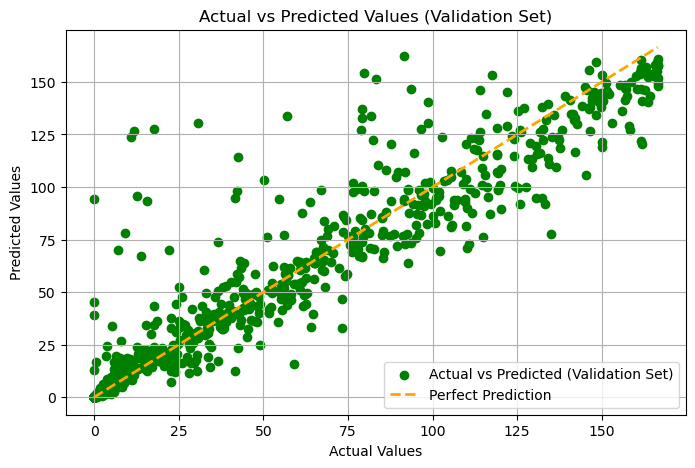

In [9]:
# Make predictions on the validation set
val_predictions = random_forest_model.predict(X_val)

val_mae = mean_absolute_error(y_val, val_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = mean_squared_error(y_val, val_predictions, squared=False)
val_r2 = r2_score(y_val, val_predictions)
average_y_val = y_val.mean()
average_val_predictions = val_predictions.mean()
val_mape = abs((average_y_val - average_val_predictions) / average_y_val) * 100

print(f'Validation MAE: {val_mae}')
print(f'Validation MSE: {val_mse}')
print(f'Validation RMSE: {val_rmse}')
print(f'Validation R^2: {val_r2}')
print(f'Validation MAPE: {val_mape:.2f}%')

plt.figure(figsize=(8, 5))
plt.scatter(y_val, val_predictions, color='green', label='Actual vs Predicted (Validation Set)')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='orange', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Validation Set)')
plt.legend()
plt.grid(True)
plt.show()


Test MAE: 5.31956944085153
Test MSE: 141.30228839011343
Test RMSE: 11.88706390956629
Test R^2: 0.9332173045145021
Test MAPE: 0.89%


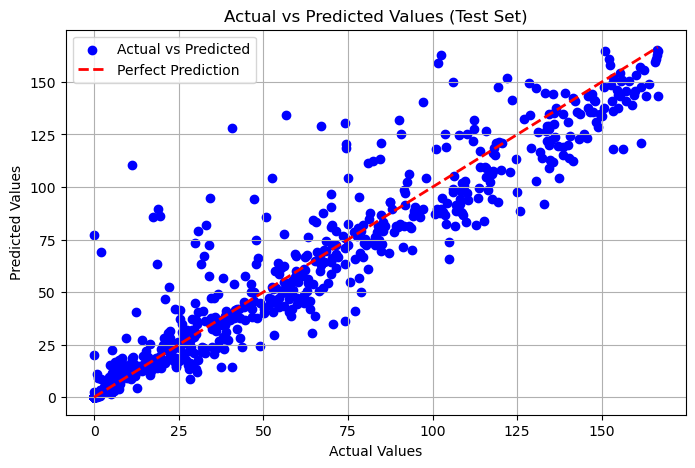

In [8]:
test_predictions = random_forest_model.predict(X_test)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)
average_y_test = y_test.mean()
average_test_predictions = test_predictions.mean()
test_mape = abs((average_y_test - average_test_predictions) / average_y_test) * 100

print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test RMSE: {test_rmse}')
print(f'Test R^2: {test_r2}')
print(f'Test MAPE: {test_mape:.2f}%')

plt.figure(figsize=(8, 5))
plt.scatter(y_test, test_predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()

Training MAE: 2.451396903470721
Training MSE: 34.09753159561099
Training RMSE: 5.8393091710930145
Training R^2: 0.9842530510905695
Training MAPE: 0.28%


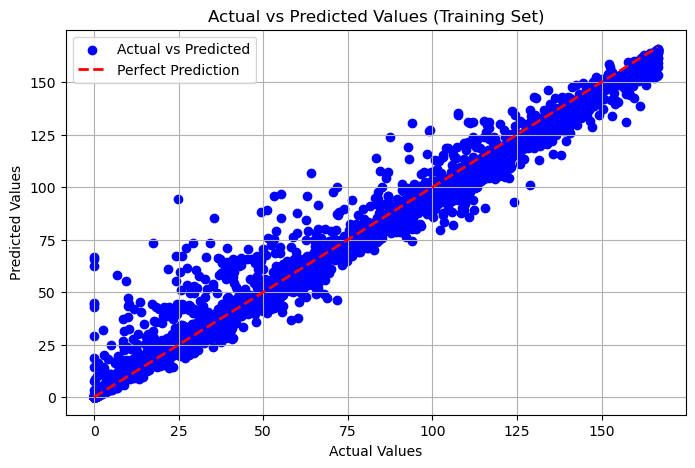

In [10]:
train_predictions = random_forest_model.predict(X_train)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_r2 = r2_score(y_train, train_predictions)
average_y_train = y_train.mean()
average_train_predictions = train_predictions.mean()
train_mape = abs((average_y_train - average_train_predictions) / average_y_train) * 100

print(f'Training MAE: {train_mae}')
print(f'Training MSE: {train_mse}')
print(f'Training RMSE: {train_rmse}')
print(f'Training R^2: {train_r2}')
print(f'Training MAPE: {train_mape:.2f}%')

plt.figure(figsize=(8, 5))
plt.scatter(y_train, train_predictions, color='blue', label='Actual vs Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Ocotober 2022 validation 

In [8]:
october_data = data[(data['Timestamp'].dt.year == 2022) & (data['Timestamp'].dt.month == 10)]

first_week_october_data = october_data[(october_data['Timestamp'] >= october_data['Timestamp'].iloc[0]) & 
                                        (october_data['Timestamp'] <= october_data['Timestamp'].iloc[0] + pd.DateOffset(7))]

first_day_october_data = october_data[(october_data['Timestamp'] >= october_data['Timestamp'].iloc[0]) & 
                                       (october_data['Timestamp'].dt.day == 1)]


In [9]:
X_october = october_data[features]
y_october_actual = october_data[target]

X_first_week_october = first_week_october_data[features]
y_first_week_october_actual = first_week_october_data[target]

X_first_day_october = first_day_october_data[features]
y_first_day_october_actual = first_day_october_data[target]


In [10]:
predictions_october = random_forest_model.predict(X_october)
predictions_first_week_october = random_forest_model.predict(X_first_week_october)
predictions_first_day_october = random_forest_model.predict(X_first_day_october)


In [11]:
mae_october = mean_absolute_error(y_october_actual, predictions_october)
mse_october = mean_squared_error(y_october_actual, predictions_october)
rmse_october = mean_squared_error(y_october_actual, predictions_october, squared=False)
r2_october = r2_score(y_october_actual, predictions_october)

mae_first_week_october = mean_absolute_error(y_first_week_october_actual, predictions_first_week_october)
mse_first_week_october = mean_squared_error(y_first_week_october_actual, predictions_first_week_october)
rmse_first_week_october = mean_squared_error(y_first_week_october_actual, predictions_first_week_october, squared=False)
r2_first_week_october = r2_score(y_first_week_october_actual, predictions_first_week_october)

mae_first_day_october = mean_absolute_error(y_first_day_october_actual, predictions_first_day_october)
mse_first_day_october = mean_squared_error(y_first_day_october_actual, predictions_first_day_october)
rmse_first_day_october = mean_squared_error(y_first_day_october_actual, predictions_first_day_october, squared=False)
r2_first_day_october = r2_score(y_first_day_october_actual, predictions_first_day_october)

average_y_october = y_october_actual.mean()
average_predictions_october = predictions_october.mean()
mape_october = abs((average_y_october - average_predictions_october) / average_y_october) * 100

average_y_first_week_october = y_first_week_october_actual.mean()
average_predictions_first_week_october = predictions_first_week_october.mean()
mape_first_week_october = abs((average_y_first_week_october - average_predictions_first_week_october) / average_y_first_week_october) * 100

average_y_first_day_october = y_first_day_october_actual.mean()
average_predictions_first_day_october = predictions_first_day_october.mean()
mape_first_day_october = abs((average_y_first_day_october - average_predictions_first_day_october) / average_y_first_day_october) * 100



In [12]:
# Print metrics and MAPE for October 2022 subsets
print("October 2022 Metrics:")
print(f'MAE: {mae_october:.2f}')
print(f'MSE: {mse_october:.2f}')
print(f'RMSE: {rmse_october:.2f}')
print(f'R^2: {r2_october:.2f}')
print(f'MAPE: {mape_october:.2f}%')

print("\nFirst Week in October 2022 Metrics:")
print(f'MAE: {mae_first_week_october:.2f}')
print(f'MSE: {mse_first_week_october:.2f}')
print(f'RMSE: {rmse_first_week_october:.2f}')
print(f'R^2: {r2_first_week_october:.2f}')
print(f'MAPE: {mape_first_week_october:.2f}%')

print("\nFirst Day in October 2022 Metrics:")
print(f'MAE: {mae_first_day_october:.2f}')
print(f'MSE: {mse_first_day_october:.2f}')
print(f'RMSE: {rmse_first_day_october:.2f}')
print(f'R^2: {r2_first_day_october:.2f}')
print(f'MAPE: {mape_first_day_october:.2f}%')

October 2022 Metrics:
MAE: 4.68
MSE: 123.28
RMSE: 11.10
R^2: 0.95
MAPE: 3.82%

First Week in October 2022 Metrics:
MAE: 5.42
MSE: 178.02
RMSE: 13.34
R^2: 0.93
MAPE: 4.21%

First Day in October 2022 Metrics:
MAE: 6.45
MSE: 227.87
RMSE: 15.10
R^2: 0.89
MAPE: 12.19%


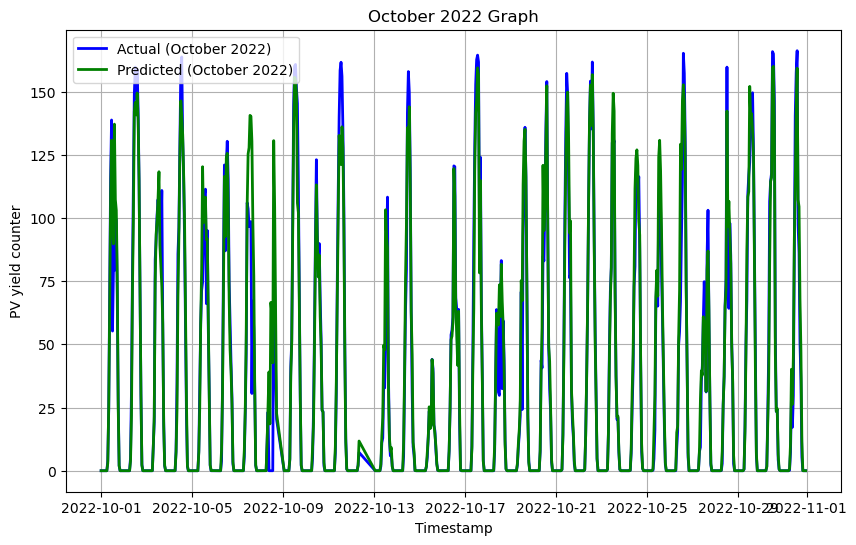

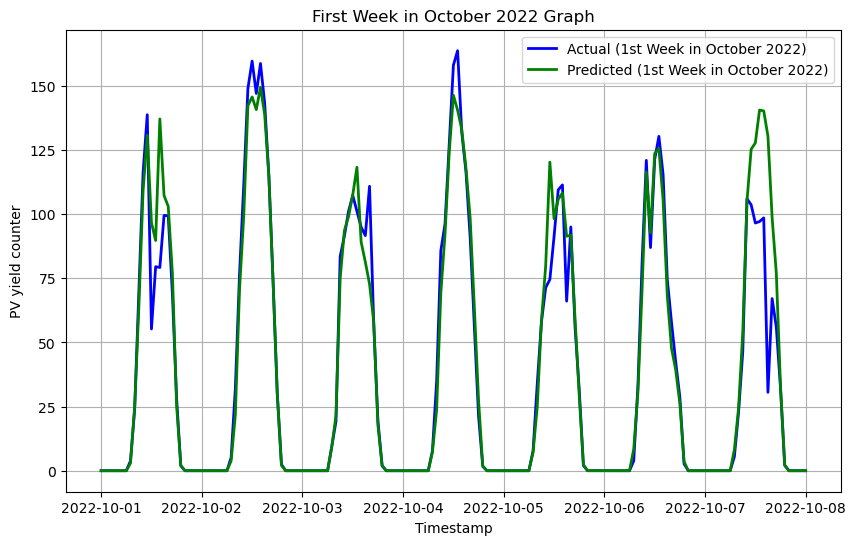

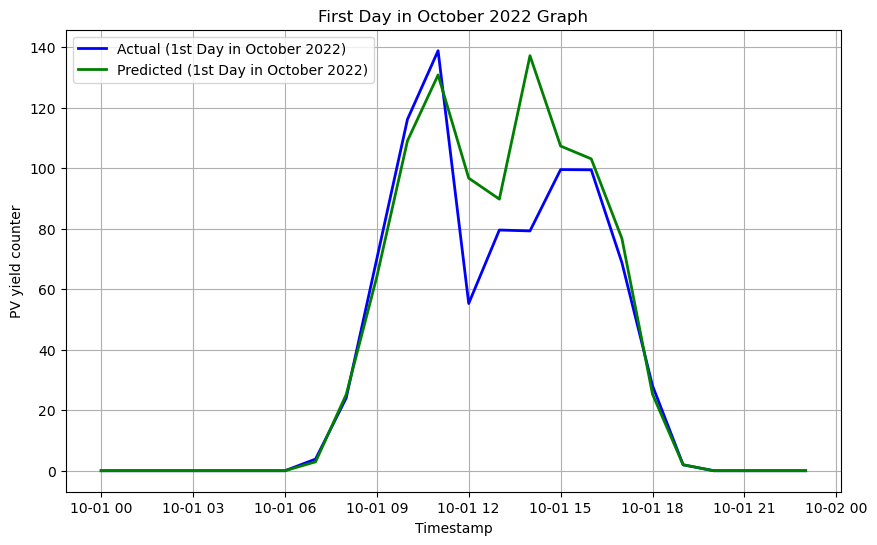

In [13]:
# Plot and print results for October 2022
plt.figure(figsize=(10, 6))
plt.plot(october_data['Timestamp'], y_october_actual, color='blue', label='Actual (October 2022)', linewidth=2)
plt.plot(october_data['Timestamp'], predictions_october, color='green', label='Predicted (October 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('October 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(first_week_october_data['Timestamp'], y_first_week_october_actual, color='blue', label='Actual (1st Week in October 2022)', linewidth=2)
plt.plot(first_week_october_data['Timestamp'], predictions_first_week_october, color='green', label='Predicted (1st Week in October 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Week in October 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(first_day_october_data['Timestamp'], y_first_day_october_actual, color='blue', label='Actual (1st Day in October 2022)', linewidth=2)
plt.plot(first_day_october_data['Timestamp'], predictions_first_day_october, color='green', label='Predicted (1st Day in October 2022)', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('PV yield counter')
plt.title('First Day in October 2022 Graph')
plt.legend()
plt.grid(True)
plt.show()